In [ ]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import seaborn as sns

In [39]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

In [41]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_datagen.flow_from_directory('/kaggle/input/tomandjerry2/Train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )
validation_generator = test_datagen.flow_from_directory('/kaggle/input/tomandjerry2/Test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 301 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [43]:
checkpoint = ModelCheckpoint('modelo_tom_jerry.hdf5',monitor='val_accuracy', verbose= 1, save_best_only=True)

In [45]:
model.compile(loss='binary_crossentropy', optimizer =optimizers.Adam(),
             metrics=['accuracy'])

In [47]:
hist = model.fit(train_generator, steps_per_epoch=301//32,
                epochs=100,
                validation_data=validation_generator,
                 validation_steps= 42//32,
                 callbacks=[checkpoint])

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 0.6477 - accuracy: 0.6208
Epoch 1: val_accuracy improved from 0.53125 to 0.56250, saving model to modelo_tom_jerry.hdf5
9/9 [==============================] - 6s 668ms/step - loss: 0.6477 - accuracy: 0.6208 - val_loss: 0.6957 - val_accuracy: 0.5625
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.6465 - accuracy: 0.6283
Epoch 2: val_accuracy improved from 0.56250 to 0.62500, saving model to modelo_tom_jerry.hdf5
9/9 [==============================] - 5s 638ms/step - loss: 0.6465 - accuracy: 0.6283 - val_loss: 0.6660 - val_accuracy: 0.6250
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.6441 - accuracy: 0.6320
Epoch 3: val_accuracy did not improve from 0.62500
9/9 [==============================] - 6s 653ms/step - loss: 0.6441 - accuracy: 0.6320 - val_loss: 0.7589 - val_accuracy: 0.5000
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.6468
Ep

In [54]:
def visualizacion_resultados(history):
  epochs = [i for i in range(100)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

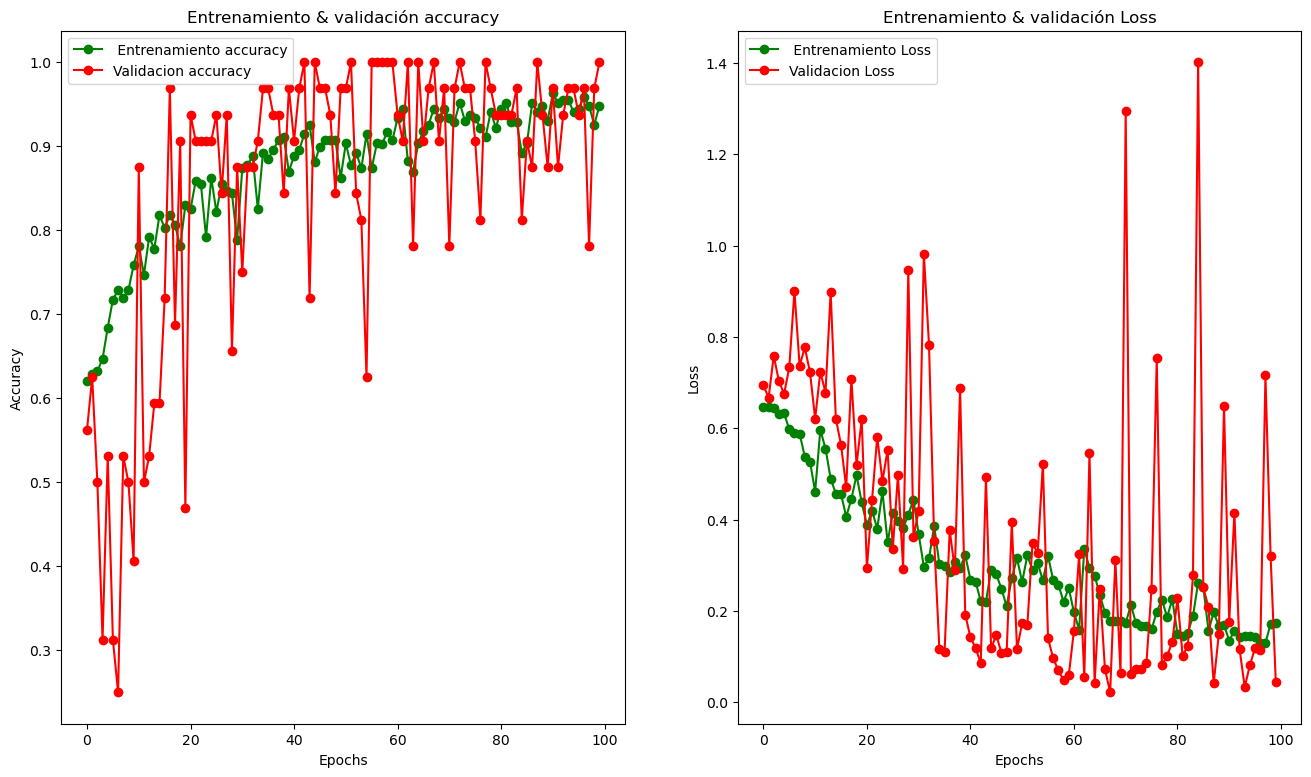

In [55]:
visualizacion_resultados(hist)